# BeautifulSoup

# 我們上課有告訴各位可以抓下OpenData，以下這兩個範例要告訴大家如何使用Request, BeautifulSoup爬網頁，抓出資料的下載網址。

## 下面這段程式用來找出下載網址放在哪裡。

In [8]:
from os.path import join
from google.colab import drive
import requests
from bs4 import BeautifulSoup as bs
import json
import re

ROOT = "/content/drive"
drive.mount(ROOT)

PROJ = "My Drive/DataScience/Ch04-CSV" # This is a custom path.
PROJECT_PATH = join(ROOT, PROJ)
!mkdir "{PROJECT_PATH}"


URL = "https://data.gov.tw/dataset/148233"
result = requests.get(URL)
myFile = join(PROJECT_PATH, "148234.html")
with open(myFile, 'w', encoding="utf8") as file:
    file.write(result.text)
soup = bs(result.text, "lxml")
#print(soup)
#targetJson = soup.select('script[type="application/ld+json"]')
target = soup.select('script[type="application/ld+json"]')
#targetJson = targetJson[targetJson.index("json")+2:]
#target = json.loads(str(targetJson))
#print(target)
TAG_RE = re.compile(r'<[^>]+>')
targetJson = json.loads(TAG_RE.sub('', str(target[0])))
#print(targetJson)
print(type(targetJson))

listIdx = 0
for i in targetJson:
  print(type(i))
  for name, value in i.items():
    #print("listIdx[{}]-->{},{}".format(listIdx, name, value))
    print()
  listIdx += 1
print(targetJson[1]["name"])
print(targetJson[1]["distribution"][0]["contentUrl"])


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
mkdir: cannot create directory ‘/content/drive/My Drive/DataScience/Ch04-CSV’: File exists
<class 'list'>
<class 'dict'>



<class 'dict'>









公司登記清冊-新北市土城區頂福里
https://data.ntpc.gov.tw/api/datasets/EE4D1A62-8F31-40D9-9133-B76D20F79E62/csv/file


## 下面這段程式抓出一堆資料的下載點

In [10]:
from os.path import join
from google.colab import drive
from bs4 import BeautifulSoup as bs
import requests
import json
import re

TAG_RE = re.compile(r'<[^>]+>')

for urlCode in range(148200,148235):
  URL = "https://data.gov.tw/dataset/{}".format(urlCode)
  result = requests.get(URL)
  soup = bs(result.text, "lxml")
  target = soup.select('script[type="application/ld+json"]')
  targetJson = json.loads(TAG_RE.sub('', str(target[0])))
  print(targetJson[1]["name"])
  print(targetJson[1]["distribution"][0]["contentUrl"])
  print()

矯正署東成技能訓練所111年會計報告(按月)
https://www.dcv.moj.gov.tw/media/20409433/111年1月會計報告-xml.zip?mediaDL=true

矯正署彰化看守所111年會計報告(按月)
https://www.chd.moj.gov.tw/media/20409375/111年1月會計月報-xml-彰化看守所.zip?mediaDL=true

矯正署臺南監獄111年會計報告(按月)
https://www.tnp.moj.gov.tw/media/20409416/111%E5%B9%B41%E6%9C%88%E4%BB%BD%E6%9C%83%E8%A8%88%E6%9C%88%E5%A0%B1.zip?mediaDL=true

法務部廉政署111年會計報告(按月) 
https://www.aac.moj.gov.tw/media/272077/111年1月會計報告.zip?mediaDL=true

矯正署彰化少年觀護所111年會計報告(按月)
https://www.chd.moj.gov.tw/media/20409373/111年1月會計月報-xml-彰化少年觀護所.zip?mediaDL=true

臺中高等行政法院110年度單位決算
https://opendata.judicial.gov.tw/JdyOpenFiles/4ed2f419-b9b9-4a25-b8f0-36064be79835.ZIP

花蓮縣酒製造業者資料
https://ws.hl.gov.tw/001/Upload/518/relfile/23071/92607/b428dfaf-5d70-481e-bd98-e9af8338d42b.csv

花蓮縣促進民間參與公共建設案件一覽表
https://ws.hl.gov.tw/001/Upload/518/relfile/23071/92607/fd4e03b0-4589-4d81-ad42-f7d42b5a575a.csv

107年花蓮縣有機農戶及種植面積
https://ws.hl.gov.tw/001/Upload/518/relfile/23071/92605/f07b03b3-aba0-4353-a84c-1c8a828ad612.csv

107年珍貴老樹列表

IndexError: ignored

## 現在是否感受到Python真的好用，美麗的濃湯非常方便？

# 連結Google Drive, 引入美麗的濃湯

In [ ]:
from os.path import join
from google.colab import drive

ROOT = "/content/drive"
drive.mount(ROOT)

PROJ = "My Drive/DataScience/Ch05" # This is a custom path.
PROJECT_PATH = join(ROOT, PROJ)
#!mkdir "{PROJECT_PATH}"

myFile = join(PROJECT_PATH, "Example.html")
with open(myFile, 'r', encoding="utf8") as file:
    data = file.read()

print(data)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<!DOCTYPE html>
<html lang="big5">
 <head>
  <meta charset="utf-8"/>
  <title>測試資料擷取的HTML網頁</title>
 </head>
 <body>
  <!-- Surveys -->
  <div class="surveys" id="surveys">
   <div class="survey" id="q1">
    <p class="question">
      <a href="http://example.com/q1">請問你的性別?</a></p>
    <ul class="answer">
     <li class="response">男 - 
       <span class="score selected">20</span></li>
     <li class="response">女 - 
       <span class="score">10</span></li>
    </ul>
   </div>
   <div class="survey" id="q2">
    <p class="question">
      <a href="http://example.com/q2">請問你是否喜歡偵探小說?</a></p>
    <ul class="answer">
     <li class="response">喜歡 - 
       <span class="score">40</span></li>
     <li class="response">普通 - 
       <span class="score selected">20</span></li>
     <li class="response">不喜歡 - 
       <span class="score">0</span></li>
    </ul>
   </di

In [ ]:
from bs4 import BeautifulSoup as bs

soup = bs(data, "lxml")

print(soup)

<!DOCTYPE html>
<html lang="big5">
<head>
<meta charset="utf-8"/>
<title>測試資料擷取的HTML網頁</title>
</head>
<body>
<!-- Surveys -->
<div class="surveys" id="surveys">
<div class="survey" id="q1">
<p class="question">
<a href="http://example.com/q1">請問你的性別?</a></p>
<ul class="answer">
<li class="response">男 - 
       <span class="score selected">20</span></li>
<li class="response">女 - 
       <span class="score">10</span></li>
</ul>
</div>
<div class="survey" id="q2">
<p class="question">
<a href="http://example.com/q2">請問你是否喜歡偵探小說?</a></p>
<ul class="answer">
<li class="response">喜歡 - 
       <span class="score">40</span></li>
<li class="response">普通 - 
       <span class="score selected">20</span></li>
<li class="response">不喜歡 - 
       <span class="score">0</span></li>
</ul>
</div>
<div class="survey" id="q3">
<p class="question">
<a href="http://example.com/q3">請問你是否會程式設計?</a></p>
<ul class="answer">
<li class="response">會 - 
       <span class="score selected">34</span></li>
<li class="

# 使用find()函數搜尋HTML網頁

我們可以使用find()函數搜尋HTML網頁來找出指定HTML標籤，其基本語法如下所示：

`find(name, attribute, recursive, text, **kwargs)`

上述函數可以搜尋到「第1個」符合條件的Python物件，即HTML標籤物件；沒有找到傳回None。
函數的參數說明，如下所示：
* name參數：指定搜尋的標籤名稱，可以找到第1個符合的HTML標籤，值可以是字串的標籤名稱、正規運算式、清單或函數。
* attribute參數：搜尋條件的HTML標籤屬性。
* recursive參數：布林值預設是True，搜尋會包含所有子孫標籤；如為False，搜尋就只限下一層子標籤，不包含再下一層的孫標籤。
* text參數：指定搜尋的標籤字串內容。

In [ ]:
# Ch5_2_1.py
# 搜尋<a>標籤
tag_a = soup.find("a") 
print(tag_a.string)
# 呼叫多次find()方法
tag_p = soup.find(name="p")
print(tag_p)
tag_a = tag_p.find(name="a")
#print(tag_p.a.string)
print(tag_a)

In [ ]:
# Ch5_2_1a.py
# 使用id屬性搜尋<div>標籤
tag_div = soup.find(id="q2")
tag_a = tag_div.find("a") 
print(tag_a.string)



In [ ]:
# Ch5_2_1b.py
# 使用class屬性搜尋<span>標籤
tag_span = soup.find(attrs={"class": "score"})
print(tag_span.string)
# 搜尋第2題的第1個<span>標籤
tag_div = soup.find(id="q2")
tag_span = tag_div.find(class_="score")
print(tag_span.string)

In [ ]:
# Ch5_2_1c.py
# 使用HTML5的data-屬性搜尋<div>標籤
tag_div = soup.find(attrs={"data-custom": "important"})
print(tag_div.string)


def@example.com


In [ ]:
# Ch5_2_1d.py
# 使用文字內容來搜尋標籤
tag_str = soup.find(text="請問你的性別?")
print(tag_str)
tag_str = soup.find(text="10")
print(tag_str)
print(type(tag_str))        # NavigableString型態
print(tag_str.parent.name)  # 父標籤名稱
tag_str = soup.find(text="男 -")
print(tag_str)

In [ ]:
# 測試取出<li>標籤的內容
tag_li = soup.find(class_="response")
print(tag_li.string)
print(tag_li.span.string)

In [ ]:
# Ch5_2_1f.py
# 使用多條件來搜尋HTML標籤
tag_div = soup.find("div", class_="question")
print(tag_div)
tag_p = soup.find("p", class_="question")
print(tag_p)


In [ ]:
# Ch5_2_1g.py
def is_secondary_question(tag):
    return tag.has_attr("href") and \
           tag.get("href") == "http://example.com/q2"

tag_a = soup.find(is_secondary_question)
print(tag_a)



In [ ]:
# Ch5_2_2.py
# 找出所有問卷的題目清單
tag_list = soup.find_all("p", class_="question")
print(tag_list)

for question in tag_list:
    print(question.a.string)

In [ ]:
# Ch5_2_2a.py
# 找出前2個問卷的題目清單
tag_list = soup.find_all("p", class_="question", limit=2)
print(tag_list)

for question in tag_list:
    print(question.a.string)

In [ ]:
# Ch5_2_2b.py
tag_div = soup.find("div", id="q2")
# 找出所有標籤清單
tag_all = tag_div.find_all(True)
print(tag_all)

In [ ]:
# Ch5_2_2c.py

tag_div = soup.find("div", id="q2")
# 找出所有文字內容清單
tag_str_list = tag_div.find_all(text=True)
print(tag_str_list)
# 找出指定的文字內容清單
tag_str_list = tag_div.find_all(text=["20", "40"])
print(tag_str_list)


In [ ]:
# Ch5_2_2d.py

tag_div = soup.find("div", id="q2")
# 找出所有<p>和<span>標籤
tag_list = tag_div.find_all(["p", "span"])
print(tag_list)
# 找出class屬性值question或selected的所有標籤
tag_list = tag_div.find_all(class_=["question", "selected"])
print(tag_list)

# CSS selectors

CSS選擇器（Selector）源於CSS層級式樣式表，可以從HTML網頁選擇出哪些HTML標籤需要套用CSS樣式。
相同原理，**BeautifulSoup物件可以呼叫select()或select_one()函數，使用CSS選擇器來找出目標的HTML標籤。**

以下列出CSS 選擇器：https://www.w3schools.com/cssref/css_selectors.asp

In [ ]:
# 搜尋<title>標籤和第3個<div>標籤
tag_title = soup.select("title")
print(tag_title)
print(tag_title[0].string)
tag_first_div = soup.find("div")
tag_div = tag_first_div.select("div:nth-of-type(3)")
print(tag_div[0])


[<title>測試資料擷取的HTML網頁</title>]
測試資料擷取的HTML網頁
<div class="survey" id="q3">
<p class="question">
<a href="http://example.com/q3">請問你是否會程式設計?</a></p>
<ul class="answer">
<li class="response">會 - 
       <span class="score selected">34</span></li>
<li class="response">不會 - 
       <span class="score">6</span></li>
</ul>
</div>


In [ ]:
# 使用階層關係搜尋<title>標籤, 和<div>標籤下的所有<a>標籤
tag_title = soup.select("html head title")
print(tag_title[0].string)    
tag_a = soup.select("body div a")
for aa in tag_a:
  print(aa)
#print(tag_a)

In [ ]:
# 搜尋指定標籤下的直接子標籤
tag_a = soup.select("p > a")
for aa in tag_a:
  print(aa)
#print(tag_a)
print()  
tag_li = soup.select("ul > li:nth-of-type(2)")
for ll in tag_li:
  print(ll)
#print(tag_li)
#print()
tag_span = soup.select("div > #email")
print(tag_span)  


In [ ]:
# 搜尋兄弟標籤
# 可以使用CSS選擇器「~」搜尋之後的所有兄弟標籤，「+」是只有下一個兄弟標籤，
tag_div = soup.find(id="q1")
print(tag_div.p.a.string)
print("-----------")
tag_div = soup.select("#q1 ~ .survey")
for item in tag_div:            
    print(item.p.a.string)  
print("-----------")
tag_div = soup.select("#q1 + .survey")
for item in tag_div:            
    print(item.p.a.string)   

In [ ]:
##  select()函數可以搜尋指定class和id屬性值的HTML標籤，
##  前2個select()函數是搜尋id屬性值q1，和<span>標籤且id屬性值是email
# 搜尋class和id屬性值的標籤
tag_div = soup.select("#q1")
print(tag_div[0].p.a.string)
tag_span = soup.select("span#email")
print(tag_span[0].string)
print("-----------")
print("-----------")

tag_div = soup.select("#q1, #q2")  # 多個id屬性
for item in tag_div:
    print(item.p.a.string)
print("-----------")
print("-----------")

tag_div = soup.find("div")  # 第1個<div>標籤
# .class 例如：	.intro	
#    Selects all elements with class="intro"
tag_p = tag_div.select(".question")   
for item in tag_p:
    print(item.a["href"])

##  [attribute~=value], 例如:[title~=flower],
##    	Selects all elements with a title attribute containing the word "flower"
tag_span = soup.select("[class~=selected]")
for item in tag_span:
    print(item.string)

# 使用正規運算式搜尋HTML網頁 

在Python程式使用正規運算式需要匯入re模組，如下所示：
```
import re
```

接著使用compile()函數建立正規運算式物件，如下所示：

```
regexp = re.compile("\w+ -")
```

In [ ]:
import re

In [ ]:
# 使用正規運算式搜尋文字內容
tag_str = soup.find(text="男 -")
print(tag_str)
print("-----------")
print()

regexp = re.compile("男 -")
tag_str = soup.find(text=regexp)
print(tag_str)
print("-----------")
print()

regexp = re.compile("\w+ -")
tag_list = soup.find_all(text=regexp)
print(tag_list)

In [ ]:
# 使用正規運算式搜尋電子郵件地址
email_regexp = re.compile("\w+@\w+\.\w+")
tag_str = soup.find(text=email_regexp)
print(tag_str)
print("---------------------")
tag_list = soup.find_all(text=email_regexp)
print(tag_list)

In [ ]:
# 使用正規運算式搜尋URL網址
url_regexp = re.compile("^http:")
tag_href = soup.find(href=url_regexp)
print(tag_href)
print("---------------------")
tag_list = soup.find_all(href=url_regexp)
print(tag_list)

# 走訪HTML網頁

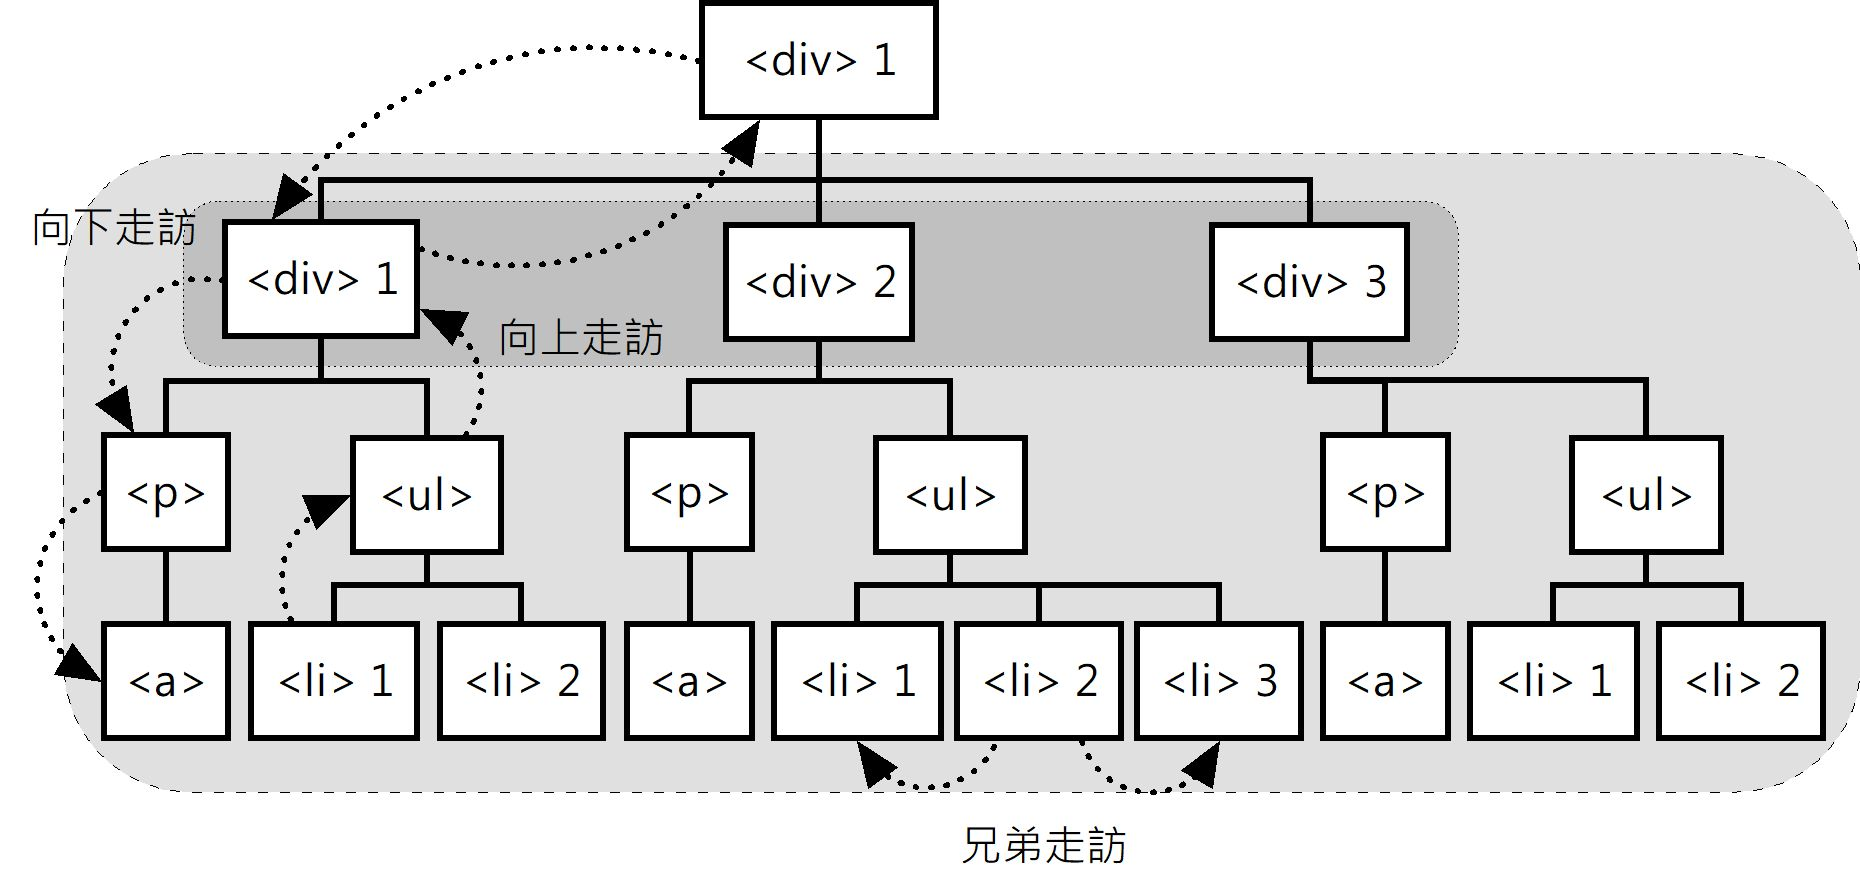

In [ ]:
# 使用childen屬性取得子標籤
tag_div = soup.select("#q2") # 找到第2題
tag_ul = tag_div[0].ul       # 走訪到之下的<ul>
for child in tag_ul.children:
    #print(type(child))
    print("-->",child)


In [ ]:
from bs4.element import NavigableString
# 使用childen屬性取得子標籤
tag_div = soup.select("#q2") # 找到第2題
tag_ul = tag_div[0].ul       # 走訪到之下的<ul>
for child in tag_ul.children:
    if not isinstance(child, NavigableString):
        print(child.name,  child.span.text)


In [ ]:
# 使用屬性向下走訪
print(soup.html.head.title.string)
print(soup.html.head.meta["charset"])
# 使用div屬性取得第1個<div>標籤
print(soup.html.body.div.div.p.a.string)


測試資料擷取的HTML網頁
utf-8
請問你的性別?


In [ ]:
#Beautiful Soup可以使用contents、children和descendants三個屬性
# 來取得之下的所有子標籤，首先是contents屬性，可以傳回子標籤的清單
# 使用屬性取得所有子標籤
tag_div = soup.select("#q2") # 找到第2題
tag_ul = tag_div[0].ul       # 走訪到之下的<ul>
for child in tag_ul.contents:
    if not isinstance(child, NavigableString):
        print(child.span.string)

40
20
0


In [ ]:
tag_div = soup.select("#q2") # 找到第2題
tag_ul = tag_div[0].ul       # 走訪到之下的<ul>            
for child in tag_ul.children:
    if not isinstance(child, NavigableString):
        print(child.name)
        for tag in child:
            if not isinstance(tag, NavigableString):
                print(tag.name, tag.string)
            else:
                print(tag.replace('\n', '---'))

In [ ]:
# 使用屬性取得所有子孫標籤
tag_div = soup.select("#q2") # 找到第2題
tag_ul = tag_div[0].ul       # 走訪到之下的<ul>            
for child in tag_ul.descendants:
    if not isinstance(child, NavigableString):
        print(child.text.replace('\n', ''))

In [ ]:
# 使用屬性取得所有子孫的文字內容
tag_div = soup.select("#q2") # 找到第2題
tag_ul = tag_div[0].ul       # 走訪到之下的<ul>
for string in tag_ul.strings:
    print(string.replace('\n', ''))

In [ ]:
tag_div = soup.select("#q2") # 找到第2題
tag_ul = tag_div[0].ul       # 走訪到之下的<ul>
# 使用屬性取得父標籤
print(tag_ul.parent.name)
# 使用函數取得父標籤
print(tag_ul.find_parent().name)

In [ ]:
tag_div = soup.select("#q2") # 找到第2題
tag_ul = tag_div[0].ul       # 走訪到之下的<ul>
# 使用屬性取得所有祖先標籤
for tag in tag_ul.parents:
    print(tag.name)
# 使用函數取得所有祖先標籤
print()
print()
for tag in tag_ul.find_parents():
    print(tag.name)

# 修改HTML網頁

In [ ]:
from bs4 import BeautifulSoup

soup = BeautifulSoup("<b class='score'>Joe</b>", "lxml")    
tag = soup.b
tag.name = "p"
tag["class"] = "question"
tag["id"] = "name"
print(tag)
del tag["class"]
print(tag)   

In [ ]:
from bs4 import BeautifulSoup

soup = BeautifulSoup("<b class='score'>Joe</b>", "lxml")    
tag = soup.b
tag.string = "Mary"
print(tag)

In [ ]:
from bs4 import BeautifulSoup
from bs4.element import NavigableString

soup = BeautifulSoup("<b></b>", "lxml")    
tag = soup.b
tag.append("Joe")
print(tag)
new_str = NavigableString(" Chen")
tag.append(new_str)
print(tag)
new_tag = soup.new_tag("a", href="http://www.example.com")
tag.append(new_tag)
print(tag)